In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("NSE-TATAGLOBAL.csv") # dataframe
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataset_train.shape

(2035, 8)

In [5]:
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) # sc dipanggil sebagai objek/class
training_set_scaled = sc.fit_transform(training_set) # dipanggil fungsi fit_transform dr class sc menggunakan atribut feature_range

In [11]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [51]:
training_set_reversed = np.flip(training_set_scaled)

In [52]:
#Creating Data with Timesteps
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_reversed[i-60:i, 0])
    y_train.append(training_set_reversed[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
X_train

array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

In [26]:
len(X_train[0, :, :])

60

In [22]:
X_train[0, :]

array([0.6202352 , 0.62226277, 0.64436334, 0.61719384, 0.61820762,
       0.62408759, 0.62793998, 0.63584753, 0.61658556, 0.57725061,
       0.54845904, 0.57339822, 0.57339822, 0.56731549, 0.57948094,
       0.57137064, 0.63706407, 0.62814274, 0.63219789, 0.62550689,
       0.61942417, 0.63219789, 0.61111111, 0.62206002, 0.64557989,
       0.67234388, 0.66058394, 0.64760746, 0.6283455 , 0.62408759,
       0.61597729, 0.63341444, 0.63077859, 0.63321168, 0.64841849,
       0.62469586, 0.62814274, 0.61394972, 0.67964315, 0.65815085,
       0.6593674 , 0.64841849, 0.62773723, 0.67883212, 0.66058394,
       0.63990268, 0.60888078, 0.6431468 , 0.6784266 , 0.65064882,
       0.71695053, 0.74574209, 0.7676399 , 0.78548256, 0.78994323,
       0.75892133, 0.76520681, 0.79622871, 0.81062449, 0.74371452])

In [19]:
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [29]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 8)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1975/1975 [==============================] - 37s 19ms/step - loss: 0.0058
Epoch 2/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0029
Epoch 3/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0022
Epoch 5/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0019
Epoch 6/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0018
Epoch 7/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0017
Epoch 8/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0017
Epoch 9/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0016
Epoch 10/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0014
Epoch 11/100
1975/1

In [11]:
dataset_test = pd.read_csv("tatatest.csv")
dataset_test['Open']
dataset_test.iloc[:, 1:2].(header=None)

SyntaxError: invalid syntax (<ipython-input-11-9b8b8b5d3dee>, line 3)

In [45]:
dataset_total = pd.concat((dataset_test['Open'], dataset_train['Open']), axis = 0)
dataset_total_reversed = dataset_total.iloc[::-1]
inputs = dataset_total_reversed[len(dataset_total_reversed) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [49]:
real_stock_price = dataset_test['Open']

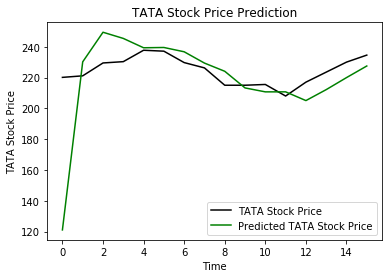

In [50]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()